In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("/Users/pallabi/Desktop/Jupyter_Notebook/aggregated_v1.csv")
data.head()

,order_date,Year,Month,order_payment_type,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,gmv,units,product_mrp,...,Affiliates_Investment,SEM_Investment,Radio_Investment,Other_Investment,gmv_per_unit,Discount,Value,Premium_Product,Holiday,Salary_day
0,2015-07-01,2015,7,Prepaid,CE,CameraAccessory,CameraStorage,299.0,1,400.000000,...,675.622048,6202.095611,0.0,0.0,299.000000,25.250000,400.00,0,0,1
1,2015-07-01,2015,7,Prepaid,CE,EntertainmentSmall,AudioMP3Player,834.0,2,1149.500000,...,1351.244096,12404.191223,0.0,0.0,417.000000,63.723358,2299.00,0,0,1
2,2015-07-01,2015,7,Prepaid,CE,EntertainmentSmall,HomeAudio,8239.0,3,3249.666667,...,2026.866144,18606.286834,0.0,0.0,2746.333333,15.488768,9749.00,0,0,1
3,2015-07-01,2015,7,Prepaid,CE,EntertainmentSmall,Speaker,1609.0,4,830.000000,...,2702.488192,24808.382445,0.0,0.0,402.250000,51.536145,3320.00,0,0,1
4,2015-07-01,2015,7,Prepaid,CE,EntertainmentSmall,TVVideoSmall,4355.0,15,1058.250000,...,8107.464577,74425.147335,0.0,0.0,290.333333,72.564769,15873.75,0,0,1


In [3]:
data['product_analytic_sub_category'].unique()

array(['CameraStorage', 'AudioMP3Player', 'HomeAudio', 'Speaker',
       'TVVideoSmall', 'Game', 'GamingAccessory', 'Camera',
       'CameraAccessory', 'AmplifierReceiver', 'AudioAccessory',
       'GamingConsole', 'HomeTheatre', 'GameMembershipCards'],
      dtype=object)

# **1.CameraStorage**

In [4]:
data_CameraStorage=data.loc[data["product_analytic_sub_category"]=='CameraStorage']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_CameraStorage[['sla',
       'TV_Investment',
       'Digital_Investment',
       'Radio_Investment',
         'Value',
        'Holiday', 'Salary_day']]
y1=data_CameraStorage['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                              1008.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:46:24   Log-Likelihood:                         -6907.7
No. Observations:                 652   AIC:                                  1.383e+04
Df Residuals:                     645   BIC:                                  1.386e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0                 sla  3.172646
1       TV_Investment  3.355292
2  Digital_Investment  1.922366
3    Radio_Investment  1.396178
4               Value  2.678124
5             Holiday  1.159140
6          Salary_day  1.076838


In [6]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

35.10094285675208

In [7]:
data_CameraStorage.columns

Index(['order_date', 'Year', 'Month', 'order_payment_type',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'gmv', 'units', 'product_mrp', 'sla',
       'product_procurement_sla', 'Total_Investment', 'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment', 'gmv_per_unit', 'Discount', 'Value',
       'Premium_Product', 'Holiday', 'Salary_day'],
      dtype='object')

# **2.AudioMP3Player**

In [8]:
data_AudioMP3Player=data.loc[data["product_analytic_sub_category"]=='AudioMP3Player']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_AudioMP3Player[[ 'units', 'sla',
         'TV_Investment',
       
       'Content_Marketing_Investment',  'Radio_Investment',
       'Premium_Product', 'Holiday', 'Salary_day']]
y1=data_AudioMP3Player['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              1097.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:46:24   Log-Likelihood:                         -8379.5
No. Observations:                 667   AIC:                                  1.677e+04
Df Residuals:                     659   BIC:                                  1.681e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

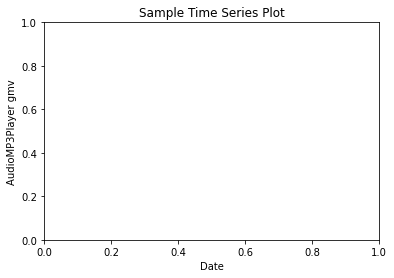

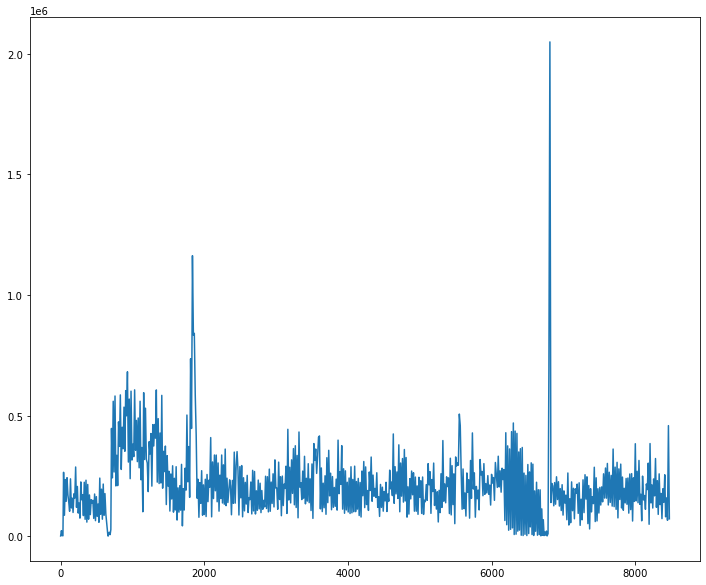

In [9]:
import matplotlib.pyplot as plt
plt.xlabel("Date")
plt.ylabel("AudioMP3Player gmv")
plt.title("Sample Time Series Plot")
plt.figure(figsize=(12, 10))
# plotting the "A" column alone
plt.plot(data_AudioMP3Player["gmv"])

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                        feature       VIF
0                         units  2.989772
1                           sla  2.810014
2                 TV_Investment  3.680667
3  Content_Marketing_Investment  1.848632
4              Radio_Investment  1.251410
5               Premium_Product  1.019653
6                       Holiday  1.154018
7                    Salary_day  1.071879


In [11]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

117.05267410091425

In [12]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_AudioMP3Player['gmv']

X=data_AudioMP3Player[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_AudioMP3Player.loc[data_AudioMP3Player['order_date']<='2016-06-01']
data_test=data_AudioMP3Player.loc[data_AudioMP3Player['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14348.965, Time=2.50 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14380.167, Time=0.61 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14377.867, Time=0.74 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14379.574, Time=1.63 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=17677.658, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=14350.784, Time=2.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14346.648, Time=2.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14358.364, Time=2.12 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=14344.408, Time=2.20 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=14346.014, Time=2.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=14333.944, Time=2.65 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=14336.923, Time=2.96 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=14352.516, Time=2.75 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=14349.291, Time=2.65 sec
 ARIMA(4,0,2)(0,0,0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-12-4b495eb5855d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


In [13]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

17.10159807876483

# 3. Home Audio

In [14]:
data_HomeAudio=data.loc[data["product_analytic_sub_category"]=='HomeAudio']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_HomeAudio[['units',  'sla',
        
       'Digital_Investment', 'TV_Investment',
     
        'Radio_Investment',
        
        'Holiday', 'Salary_day']]
y1=data_HomeAudio['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              7104.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:47:03   Log-Likelihood:                         -8297.5
No. Observations:                 665   AIC:                                  1.661e+04
Df Residuals:                     658   BIC:                                  1.664e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0               units  3.045761
1                 sla  2.502378
2  Digital_Investment  2.101314
3       TV_Investment  4.208460
4    Radio_Investment  1.403118
5             Holiday  1.178741
6          Salary_day  1.073488


In [16]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

12.772273869686504

# **4.TVVideoSmall**

In [17]:
data_TVVideoSmall=data.loc[data["product_analytic_sub_category"]=='TVVideoSmall']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_TVVideoSmall[['units','product_mrp',
       'TV_Investment',
       'Digital_Investment', 
       'Online_Marketing_Investment',
         
       'Other_Investment',
       'Holiday', 'Salary_day']]
y1=data_TVVideoSmall['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              2089.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:47:03   Log-Likelihood:                         -8496.0
No. Observations:                 670   AIC:                                  1.701e+04
Df Residuals:                     662   BIC:                                  1.704e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                       feature       VIF
0                        units  2.832711
1                  product_mrp  2.227114
2                TV_Investment  5.457957
3           Digital_Investment  1.977515
4  Online_Marketing_Investment  6.988598
5             Other_Investment  1.506577
6                      Holiday  1.164985
7                   Salary_day  1.068280


In [19]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

111.62336256682424

In [20]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_TVVideoSmall['gmv']

X=data_TVVideoSmall[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_TVVideoSmall.loc[data_TVVideoSmall['order_date']<='2016-06-01']
data_test=data_TVVideoSmall.loc[data_TVVideoSmall['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14678.190, Time=2.77 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14754.376, Time=0.69 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14752.827, Time=1.74 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14754.547, Time=2.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18068.799, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=14687.972, Time=2.53 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14675.771, Time=2.64 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14725.330, Time=2.52 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=14673.268, Time=2.54 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=14673.785, Time=2.72 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=14678.973, Time=2.77 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=14671.418, Time=2.50 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=14751.132, Time=1.24 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=14673.898, Time=2.38 sec
 ARIMA(2,0,1)(0,0,0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-20-cf8920cdcd41>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


6.462013740078669

<AxesSubplot:>

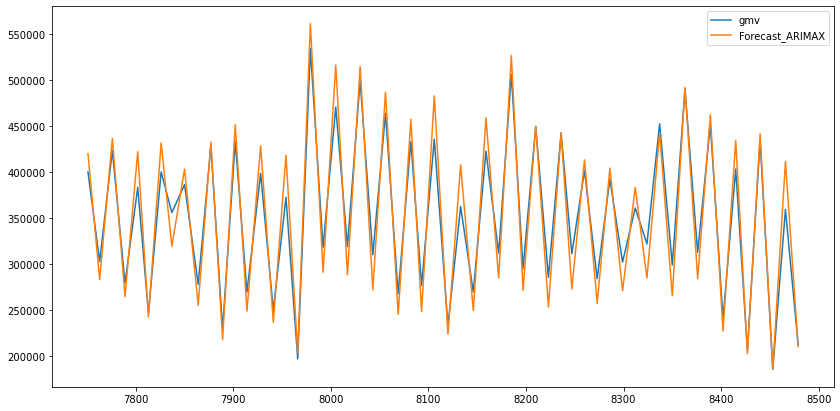

In [21]:
data_test[["gmv", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

# **5.Game**

In [22]:
data_Game=data.loc[data["product_analytic_sub_category"]=='Game']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_Game[['units','sla',
      
       'Digital_Investment', 'Sponsorship_Investment',
        
         
       'Other_Investment',
       'Holiday']]
y1=data_Game['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                              4606.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:47:42   Log-Likelihood:                         -8292.2
No. Observations:                 663   AIC:                                  1.660e+04
Df Residuals:                     657   BIC:                                  1.662e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                  feature       VIF
0                   units  3.504191
1                     sla  2.742045
2      Digital_Investment  3.129351
3  Sponsorship_Investment  5.657271
4        Other_Investment  1.308529
5                 Holiday  1.202119


In [24]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

20.92707067069125

In [25]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_Game['gmv']

X=data_Game[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_Game.loc[data_Game['order_date']<='2016-06-01']
data_test=data_Game.loc[data_Game['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14576.546, Time=2.79 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14848.799, Time=0.64 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14696.279, Time=2.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14595.092, Time=2.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18111.558, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14569.171, Time=2.61 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14578.157, Time=2.73 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14673.963, Time=2.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14571.089, Time=2.77 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=14649.744, Time=2.78 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14569.463, Time=2.97 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=14568.255, Time=2.48 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14577.090, Time=2.42 sec
 ARIMA(2,1,0)(0,0,0)[0]  

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-25-1ed7f90fcdc1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


18.09115683335454

# **6.GamingAccessory**

In [26]:
data_GamingAccessory=data.loc[data["product_analytic_sub_category"]=='GamingAccessory']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_Game[['units', 
       'TV_Investment',
       'Digital_Investment',
       
        'Radio_Investment',
       'Discount',
       'Holiday', 'Salary_day']]
y1=data_Game['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              3777.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:48:36   Log-Likelihood:                         -8306.0
No. Observations:                 663   AIC:                                  1.663e+04
Df Residuals:                     656   BIC:                                  1.666e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0               units  3.137446
1       TV_Investment  3.031495
2  Digital_Investment  1.733694
3    Radio_Investment  1.455536
4            Discount  2.977696
5             Holiday  1.177484
6          Salary_day  1.070382


In [28]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

14.5655124090022

In [29]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_GamingAccessory['gmv']

X=data_GamingAccessory[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_GamingAccessory.loc[data_GamingAccessory['order_date']<='2016-06-01']
data_test=data_GamingAccessory.loc[data_GamingAccessory['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14977.904, Time=2.88 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15039.639, Time=1.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15040.803, Time=1.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15041.136, Time=1.00 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18405.096, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=14988.921, Time=2.69 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14980.834, Time=2.74 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=14980.561, Time=3.06 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=14978.015, Time=3.28 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=15015.655, Time=2.70 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=14990.680, Time=2.81 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=14982.071, Time=3.09 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=14978.835, Time=3.38 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=14975.958, Time=2.72 sec
 ARIMA(1,0,2)(0,0,0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-29-edec19df6d6a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


8.997683029902563

# 7.Camera

In [30]:
data_Camera=data.loc[data["product_analytic_sub_category"]=='Camera']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_Camera[['units','product_mrp',
       'TV_Investment',
       'Digital_Investment',
        
        'Radio_Investment',
     
       'Holiday', 'Salary_day']]
y1=data_Camera['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              4112.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:49:35   Log-Likelihood:                         -9845.7
No. Observations:                 662   AIC:                                  1.971e+04
Df Residuals:                     655   BIC:                                  1.974e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0               units  2.283227
1         product_mrp  2.516739
2       TV_Investment  3.632924
3  Digital_Investment  1.997600
4    Radio_Investment  1.438932
5             Holiday  1.302396
6          Salary_day  1.070863


In [32]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

22.14278638573964

In [33]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_Camera['gmv']

X=data_Camera[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_Camera.loc[data_Camera['order_date']<='2016-06-01']
data_test=data_Camera.loc[data_Camera['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=16386.249, Time=3.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16459.770, Time=0.54 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=16399.600, Time=0.90 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=16417.548, Time=1.68 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19722.532, Time=1.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=16389.312, Time=2.67 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16385.838, Time=2.70 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=16388.783, Time=1.87 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=16386.131, Time=2.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16387.419, Time=5.29 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=16387.168, Time=3.40 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=16389.151, Time=2.53 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=16383.482, Time=2.48 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=16386.528, Time=2.25 sec
 ARIMA(2,0,0)(0,0,0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-33-a64f86e52e4b>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


5.251036400771156

# 8.CameraAccessory

In [34]:
data_CameraAccessory=data.loc[data["product_analytic_sub_category"]=='CameraAccessory']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_CameraAccessory[[
        'TV_Investment',
       'Digital_Investment',
       
       'Radio_Investment',
       'Value',
       'Holiday', 'Salary_day']]
y1=data_CameraAccessory['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              6231.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:50:24   Log-Likelihood:                         -8425.5
No. Observations:                 670   AIC:                                  1.686e+04
Df Residuals:                     664   BIC:                                  1.689e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0       TV_Investment  2.904846
1  Digital_Investment  1.665825
2    Radio_Investment  1.333835
3               Value  2.287852
4             Holiday  1.160212
5          Salary_day  1.055330


In [36]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

57.58720415791163

In [37]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_CameraAccessory['gmv']

X=data_CameraAccessory[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_CameraAccessory.loc[data_CameraAccessory['order_date']<='2016-06-01']
data_test=data_CameraAccessory.loc[data_CameraAccessory['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=14876.370, Time=3.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14963.016, Time=0.87 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=14959.027, Time=1.95 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=14961.806, Time=4.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18277.438, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=14883.710, Time=4.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=14877.859, Time=4.37 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=14880.492, Time=4.16 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=14876.351, Time=4.64 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=14881.664, Time=3.30 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=14878.093, Time=3.46 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=14875.652, Time=4.11 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=14880.250, Time=4.41 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=14889.093, Time=4.67 sec
 ARIMA(2,0,5)(0,0,0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-37-bfafad88994e>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


10.946680781586648

<AxesSubplot:>

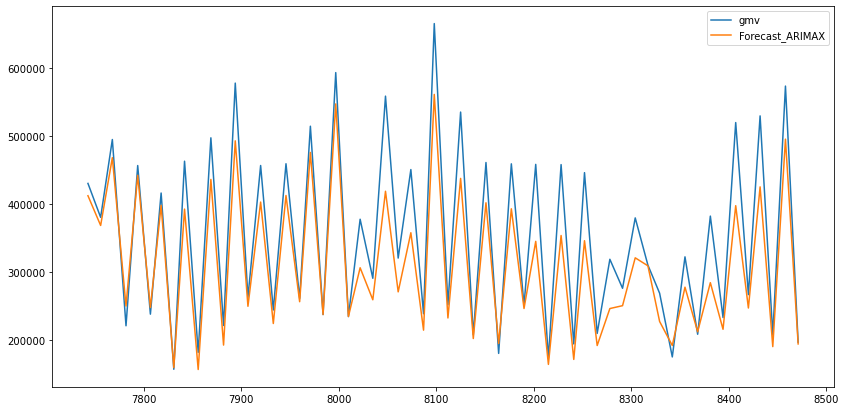

In [38]:
data_test[["gmv", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

# 9.AmplifierReceiver

In [39]:
data_AmplifierReceiver=data.loc[data["product_analytic_sub_category"]=='AmplifierReceiver']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_AmplifierReceiver[[
        'units','product_mrp',
       'TV_Investment',
     
       'Content_Marketing_Investment',
        'SEM_Investment', 'Radio_Investment',
       'Discount',
       'Holiday', 'Salary_day']]
y1=data_AmplifierReceiver['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              795.4
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                   1.83e-322
Time:                        01:52:07   Log-Likelihood:                         -5985.8
No. Observations:                 597   AIC:                                  1.199e+04
Df Residuals:                     588   BIC:                                  1.203e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                        feature       VIF
0                         units  3.890913
1                   product_mrp  3.049413
2                 TV_Investment  5.353705
3  Content_Marketing_Investment  2.499165
4                SEM_Investment  1.453813
5              Radio_Investment  1.217289
6                      Discount  3.881878
7                       Holiday  1.178002
8                    Salary_day  1.089373


In [41]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

51.19434976318037

In [42]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_AmplifierReceiver['gmv']

X=data_AmplifierReceiver[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_AmplifierReceiver.loc[data_AmplifierReceiver['order_date']<='2016-06-01']
data_test=data_AmplifierReceiver.loc[data_AmplifierReceiver['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10367.040, Time=5.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10388.724, Time=1.81 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10367.908, Time=2.44 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10370.933, Time=3.21 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10393.395, Time=2.34 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=10371.425, Time=3.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10366.383, Time=4.35 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10369.566, Time=3.92 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=10368.534, Time=4.47 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=10368.486, Time=3.68 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=10370.681, Time=4.03 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=10375.226, Time=4.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=10372.329, Time=3.60 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 47.236 seconds


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-42-7c40004f67a5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


16.63778728184181

<AxesSubplot:>

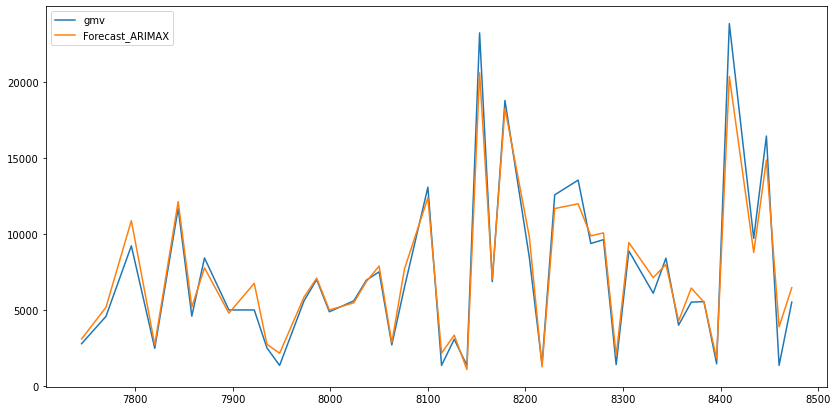

In [43]:
data_test[["gmv", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

# 10.AudioAccessory

In [44]:
data_AudioAccessory=data.loc[data["product_analytic_sub_category"]=='AudioAccessory']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_AudioAccessory[['product_mrp',
       'TV_Investment',
       'Digital_Investment',
       'Radio_Investment',
       'Discount','Value',
       'Holiday', 'Salary_day']]
y1=data_AudioAccessory['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              4235.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:53:00   Log-Likelihood:                         -6435.6
No. Observations:                 645   AIC:                                  1.289e+04
Df Residuals:                     637   BIC:                                  1.292e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0         product_mrp  2.048494
1       TV_Investment  3.882450
2  Digital_Investment  1.994989
3    Radio_Investment  1.369041
4            Discount  3.124498
5               Value  2.520033
6             Holiday  1.111634
7          Salary_day  1.081388


In [46]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

30.384635707874185

In [47]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_AudioAccessory['gmv']

X=data_AudioAccessory[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_AudioAccessory.loc[data_AudioAccessory['order_date']<='2016-06-01']
data_test=data_AudioAccessory.loc[data_AudioAccessory['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=11560.120, Time=5.97 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11556.262, Time=1.61 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=11557.989, Time=1.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11558.047, Time=1.73 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14711.059, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=11560.383, Time=1.62 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 12.392 seconds


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-47-992c21ba0f64>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


20.46152158636794

<AxesSubplot:>

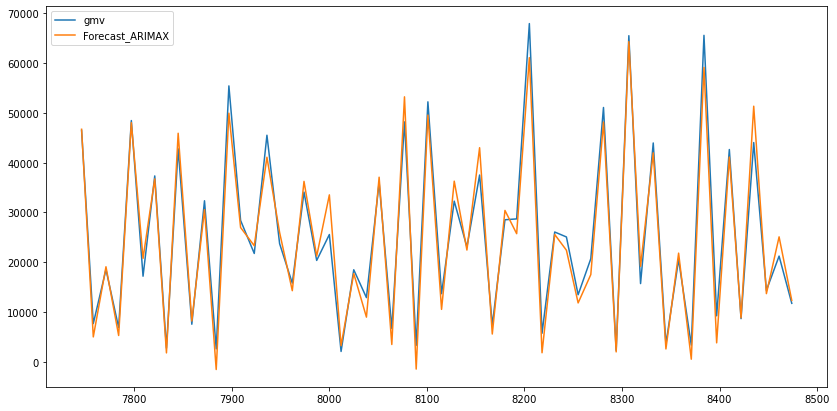

In [48]:
data_test[["gmv", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

# 11.GamingConsole

In [49]:
data_GamingConsole=data.loc[data["product_analytic_sub_category"]=='GamingConsole']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_GamingConsole[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment',
       'Other_Investment',
       'Holiday', 'Salary_day']]
y1=data_GamingConsole['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.931
Model:                            OLS   Adj. R-squared (uncentered):              0.930
Method:                 Least Squares   F-statistic:                              1106.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:53:13   Log-Likelihood:                         -8891.0
No. Observations:                 661   AIC:                                  1.780e+04
Df Residuals:                     653   BIC:                                  1.783e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0               units  2.576829
1         product_mrp  3.545937
2                 sla  4.541847
3       TV_Investment  3.515439
4  Digital_Investment  2.096374
5    Other_Investment  1.684949
6             Holiday  1.252754
7          Salary_day  1.081763


In [51]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

236.1454110474023

In [52]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_GamingConsole['gmv']

X=data_GamingConsole[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_GamingConsole.loc[data_GamingConsole['order_date']<='2016-06-01']
data_test=data_GamingConsole.loc[data_GamingConsole['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14269.311, Time=3.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14542.630, Time=0.60 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14394.744, Time=5.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14282.060, Time=3.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17792.589, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14271.881, Time=5.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14269.418, Time=4.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14271.354, Time=3.33 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14269.233, Time=3.45 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14270.771, Time=3.32 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14272.969, Time=7.89 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=14269.319, Time=5.31 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=14271.849, Time=5.68 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=14272.951, Time=6.54 sec
 ARIMA(2,1,3)(0,0,0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-52-1588eec42dc0>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


15.392818100489722

<AxesSubplot:>

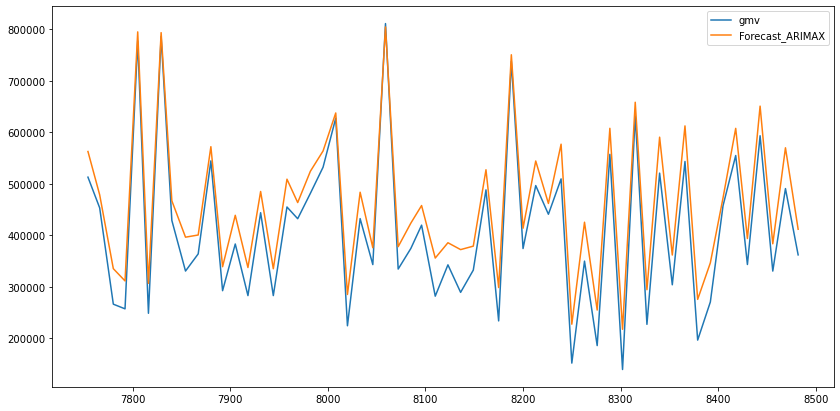

In [53]:
data_test[["gmv", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

# 12.HomeTheatre

In [54]:
data_HomeTheatre=data.loc[data["product_analytic_sub_category"]=='HomeTheatre']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_HomeTheatre[['units','product_mrp', 'sla',
       'TV_Investment',
       'Content_Marketing_Investment', 'Radio_Investment',
       'Discount',
       'Holiday', 'Salary_day']]
y1=data_HomeTheatre['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              2042.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:54:20   Log-Likelihood:                         -5757.4
No. Observations:                 511   AIC:                                  1.153e+04
Df Residuals:                     502   BIC:                                  1.157e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                        feature       VIF
0                         units  2.935674
1                   product_mrp  3.420054
2                           sla  4.366449
3                 TV_Investment  3.004899
4  Content_Marketing_Investment  2.543898
5              Radio_Investment  1.534346
6                      Discount  4.236139
7                       Holiday  1.234723
8                    Salary_day  1.075114


In [56]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

105.97747392358845

In [57]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_HomeTheatre['gmv']

X=data_HomeTheatre[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_HomeTheatre.loc[data_HomeTheatre['order_date']<='2016-06-01']
data_test=data_HomeTheatre.loc[data_HomeTheatre['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9362.081, Time=2.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9402.311, Time=0.71 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9403.850, Time=0.53 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9404.144, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11749.991, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=9371.819, Time=2.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=9366.351, Time=2.19 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=9363.826, Time=2.64 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=9363.595, Time=2.83 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9385.739, Time=2.20 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=9370.519, Time=2.72 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=9367.760, Time=2.66 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=9362.029, Time=3.75 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=9361.967, Time=3.96 sec
 ARIMA(4,0,2)(0,0,0)[0] intercep

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-57-c7072acc1824>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


48.838259818514594

<AxesSubplot:>

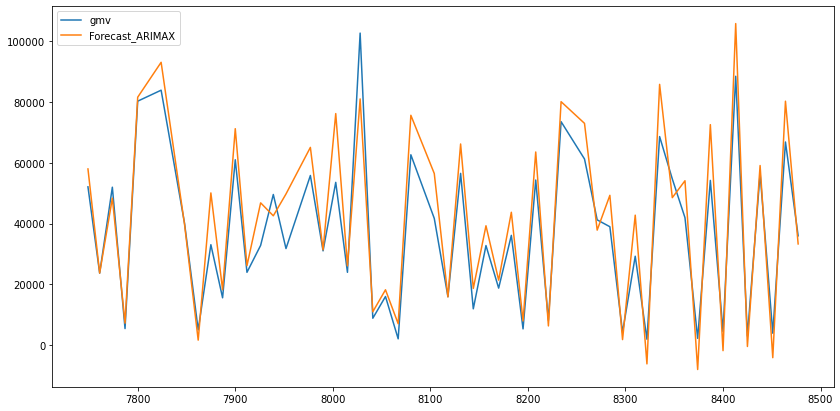

In [58]:
data_test[["gmv", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

# 13.GameMembershipCards

In [59]:
data_GameMembershipCards=data.loc[data["product_analytic_sub_category"]=='GameMembershipCards']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_GameMembershipCards[['units','product_mrp',
       'Other_Investment','Discount',
       'Holiday', 'Salary_day']]
y1=data_GameMembershipCards['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              321.8
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                    5.84e-41
Time:                        01:55:36   Log-Likelihood:                         -416.05
No. Observations:                  61   AIC:                                      844.1
Df Residuals:                      55   BIC:                                      856.8
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

            feature       VIF
0             units  1.557000
1       product_mrp  2.538363
2  Other_Investment  1.787882
3          Discount  4.220463
4           Holiday  1.066907
5        Salary_day  1.126834


In [61]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

45.166549198493286

In [62]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_GameMembershipCards['gmv']

X=data_GameMembershipCards[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_GameMembershipCards.loc[data_GameMembershipCards['order_date']<='2016-06-01']
data_test=data_GameMembershipCards.loc[data_GameMembershipCards['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=785.720, Time=1.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=784.162, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=783.599, Time=0.91 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=785.461, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=782.331, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=784.321, Time=0.59 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 4.395 seconds


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-62-575f9afba462>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


112.96179156627635

<AxesSubplot:>

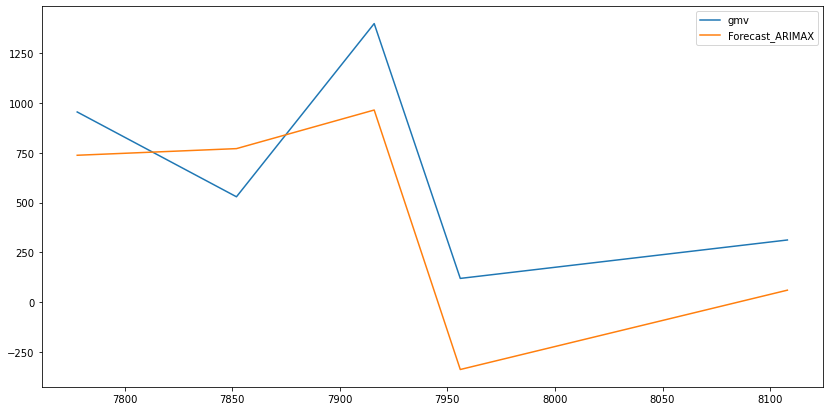

In [63]:
data_test[["gmv", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

# 14.Speaker

In [64]:
data_Speaker=data.loc[data["product_analytic_sub_category"]=='Speaker']

import numpy as np
import pandas as pd
import statsmodels.api as sm

X=data_Speaker[['units','product_mrp',
       'TV_Investment',
       'Digital_Investment','Radio_Investment',
       'Holiday', 'Salary_day']]
y1=data_Speaker['gmv']
mod = sm.OLS(y1,X.astype(float))
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1904.
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        01:55:42   Log-Likelihood:                         -9565.8
No. Observations:                 681   AIC:                                  1.915e+04
Df Residuals:                     674   BIC:                                  1.918e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0               units  2.155481
1         product_mrp  1.738128
2       TV_Investment  3.055885
3  Digital_Investment  2.047466
4    Radio_Investment  1.364072
5             Holiday  1.189964
6          Salary_day  1.069459


In [66]:
ypred = res.predict(X)
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

mean_absolute_percentage_error(y1,ypred)

452.35831275879866

In [67]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
exogenous_features=['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']

y=data_Speaker['gmv']

X=data_Speaker[['units','product_mrp', 'sla',
       'TV_Investment',
       'Digital_Investment', 'Sponsorship_Investment',
       'Content_Marketing_Investment', 'Online_Marketing_Investment',
       'Affiliates_Investment', 'SEM_Investment', 'Radio_Investment',
       'Other_Investment','Discount','Value',
       'Holiday', 'Salary_day']]
data_train=data_Speaker.loc[data_Speaker['order_date']<='2016-06-01']
data_test=data_Speaker.loc[data_Speaker['order_date']>'2016-06-01']
from pmdarima.arima import auto_arima
model = auto_arima(data_train.gmv, exogenous=data_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(data_train.gmv, exogenous=data_train[exogenous_features])
forecast = model.predict(n_periods=len(data_test), exogenous=data_test[exogenous_features])
data_test["Forecast_ARIMAX"] = forecast

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(data_test.gmv, data_test.Forecast_ARIMAX)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=16477.830, Time=4.45 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=16607.273, Time=5.77 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=16605.312, Time=1.85 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=16607.334, Time=5.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19993.122, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=16490.044, Time=2.96 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=16473.280, Time=3.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=16567.136, Time=2.78 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=16472.217, Time=2.71 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=16473.175, Time=3.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=16474.969, Time=3.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=16470.947, Time=2.67 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=16604.209, Time=0.83 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=16472.418, Time=2.76 sec
 ARIMA(2,0,1)(0,0,0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
<ipython-input-67-3e4d29c3fa98>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["Forecast_ARIMAX"] = forecast


6.343609543231675

<AxesSubplot:>

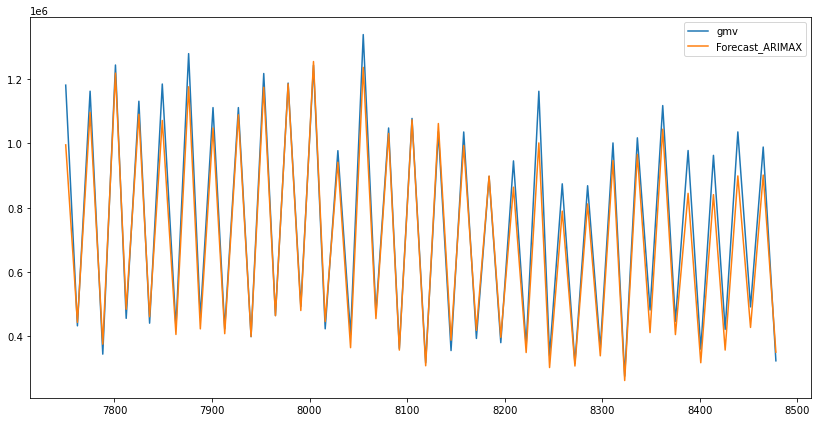

In [68]:
data_test[["gmv", "Forecast_ARIMAX"]].plot(figsize=(14, 7))